In [2]:
from iertools.read import read_epw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot
import matplotlib.ticker as ticker

from windrose import WindroseAxes


In [3]:
# plt.style.use('matplotlib.mplstyle')


In [4]:
f = 'data/Temixco_2018CST.epw'
df = read_epw(f,alias=True)

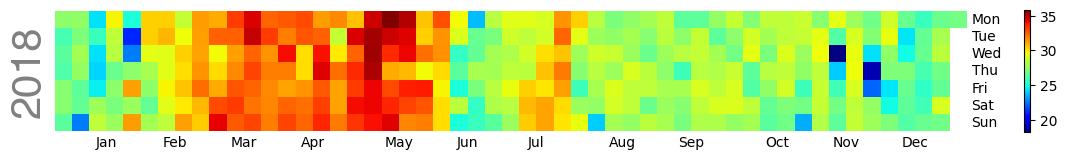

In [8]:
#| label: fig-to-calplot
#| fig-cap: Temperaturas máximas diarias en Temixco, Morelos.
calplot.calplot(df.To.resample('D').max(),
                linewidth=0,cmap='jet',colorbar=None);

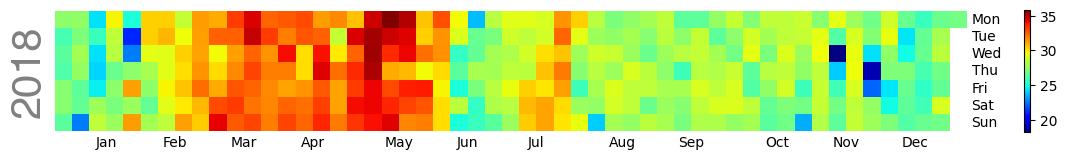

In [7]:
#| label: fig-to-calplot-2
#| fig-cap: Temperaturas máximas diarias en Temixco, Morelos.
calplot.calplot(df.To.resample('D').max(),
                linewidth=0,
                cmap='jet',colorbar=None);

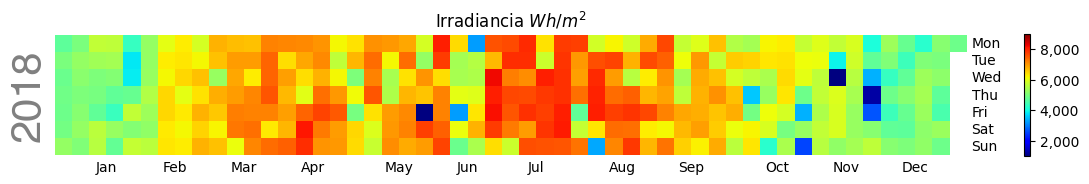

In [9]:
#| label: fig-ig-calplot
#| fig-cap: Irradiancia diaria en Temixco, Morelos.
cal, cax =calplot.calplot(df.Ig.resample('D').sum()*1/6,
                linewidth=0,cmap='jet',colorbar=None,
               vmin=1000,vmax=9000);

cal.axes[0].set_title('Irradiancia $Wh/m^2$');

def format_func(x, pos):
    return f'{x:,.0f}'  # Añade separadores de miles, sin decimales

# Usa FuncFormatter con la función de formato definida anteriormente
formatter = ticker.FuncFormatter(format_func)

# Aplica el formatter al colorbar
cax = plt.gcf().axes[-1]  # Asumiendo que el colorbar es el último eje añadido
cax.yaxis.set_major_formatter(formatter)


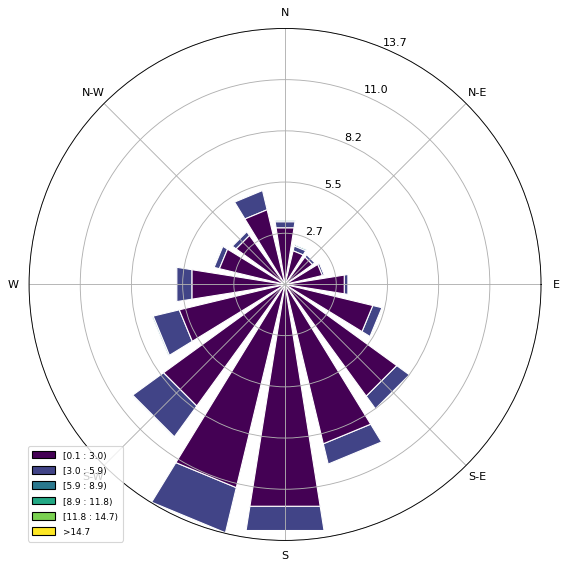

In [6]:
#| label: fig-windrose-dia
#| fig-cap: Viento durante el día
dia = df.between_time("08:00:00","20:00:00")
ax = WindroseAxes.from_ax()
ax.bar(dia.Wd, dia.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white")
ax.set_legend();
# ax.set_title("Día");

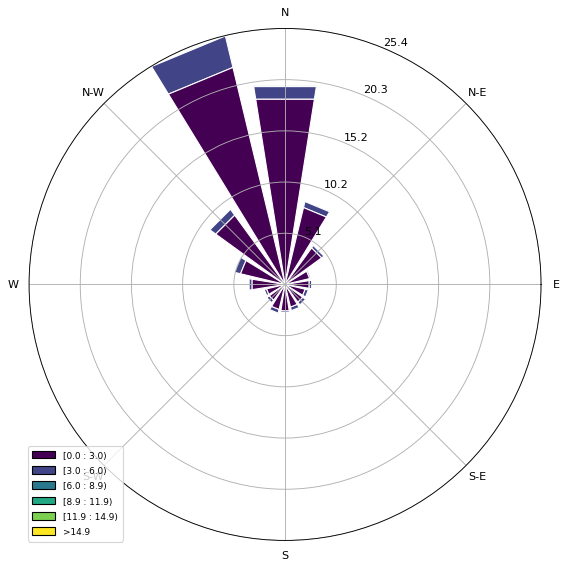

In [7]:
#| label: fig-windrose-noche
#| fig-cap: Viento durante la noche
noche = df.between_time("20:00:00","08:00:00")
ax = WindroseAxes.from_ax()
ax.bar(noche.Wd, noche.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white")
ax.set_legend();
